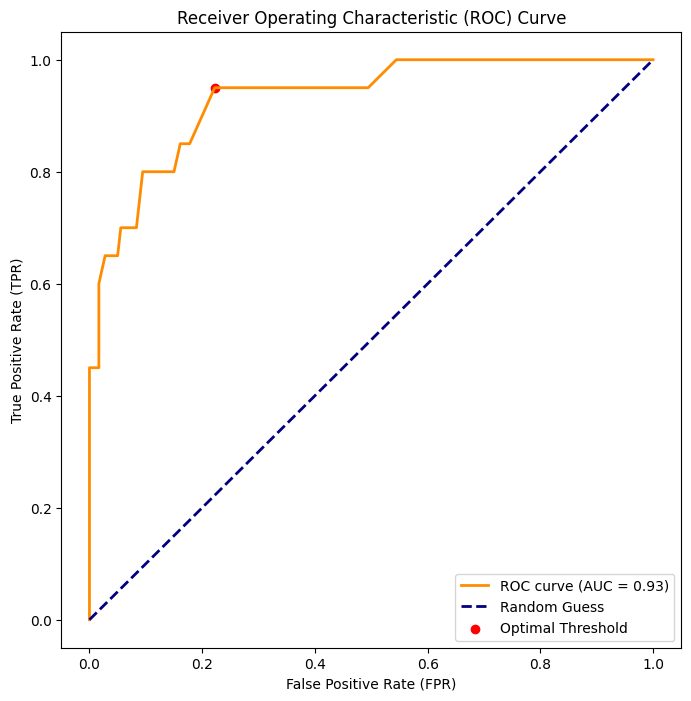

Optimal Threshold: 0.13


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Generate synthetic imbalanced data for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, n_informative=10,
                           weights=[0.9, 0.1], random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier as an example model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict probabilities for the positive class
y_pred_probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC-ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')

# Choose a threshold (maximizing Youden's J statistic) and plot the point on the curve
optimal_threshold_index = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_threshold_index]
plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], marker='o', color='red', label='Optimal Threshold')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

print('Optimal Threshold:', optimal_threshold)
